<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0326_%EA%B3%BC%EC%A0%9C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 4주차 과제2
- 기상청 데이터, 공공 데이터를 갖고 분석 진행
- 기상청 데이터에 들어가 날씨 데이터를 받아온다
- 비교할 분석 목적(날씨에 대한 비교 분석 가설)을 세우고 분석을 진행해주세요!
- 시각화도 간단히 진행하고, 왜 이 데이터를 선정했는지도 꼭 명시해주세요
- (ex. 날씨와 경제지표와의 관계 분석 진행)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import font_manager, rc

**1. 분석 가설 설정**
- "태풍이 당해 농작물에 미치는 영향에 대해 알아본다"
- 사용한 공공 데이터: 농랍축산식품부 농립업생산액 및 생산지수
- 사용한 기상청 데이터: 2001년~2011년까지의 태풍 발생 횟수와 직접 영향 횟수

In [ ]:
# 공공 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

agriculture = pd.read_csv('/content/drive/My Drive/농림업.csv')
agriculture

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,품목별,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,농림업,36.0,40.5,38.2,39.5,45.5,44.9,46.0,47.7,50.3,...,98.9,94.1,97.5,98.6,97.1,98.5,103.4,105.9,101.5,92.6
1,농업,35.4,39.8,37.4,38.6,44.5,43.7,44.8,46.6,48.8,...,100.1,94.7,98.7,99.5,98.0,99.5,104.6,106.2,101.5,92.3
2,재배업,55.8,61.6,57.7,58.3,65.3,63.3,64.8,66.6,68.6,...,108.9,99.9,108.9,108.6,104.2,104.3,107.6,107.6,97.6,94.8
3,식량작물,111.4,120.7,109.3,106.8,123.2,119.0,117.7,116.7,119.5,...,110.8,99.2,112.5,109.7,105.6,99.4,108.8,110.0,95.4,94.6
4,채소,15.5,20.1,21.6,25.0,24.8,23.7,28.9,28.2,28.2,...,112.8,108.9,117.3,114.7,109.6,111.0,111.1,108.4,96.7,94.7
5,과실,8.2,8.9,9.5,10.7,11.7,11.7,11.1,14.2,17.4,...,95.9,87.0,92.6,100.8,96.7,106.5,106.1,109.4,96.4,94.2
6,특용작물,53.7,70.1,78.2,80.3,94.9,94.5,101.6,94.3,98.9,...,121.8,83.2,113.4,121.5,102.3,115.1,116.9,99.7,110.5,89.8
7,약용작물,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.8,77.4,72.1,90.2,79.3,104.8,79.0,94.0,101.8,104.2
8,화훼류,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.0,137.5,128.9,146.3,137.0,131.3,119.8,109.0,112.4,78.5
9,버섯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,134.3,124.8,139.7,111.2,88.4,89.5,93.1,84.5,113.9,101.6


In [ ]:
# 기상청 데이터 불러오기
typhoon = pd.read_csv('/content/drive/My Drive/태풍발생.csv')
typhoon

,년,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연합계
0,2001,0(0),0(0),0(0),0(0),1(0),2(0),5(0),6(1),5(0),3(0),1(0),3(0),26(1)
1,2002,1(0),1(0),0(0),0(0),1(0),3(1),5(2),6(1),4(0),2(0),2(0),1(0),26(4)
2,2003,1(0),0(0),0(0),1(0),2(1),2(1),2(0),5(1),3(1),3(0),2(0),0(0),21(4)
3,2004,0(0),0(0),0(0),1(0),2(0),5(1),2(1),8(3),3(0),3(0),3(0),2(0),29(5)
4,2005,1(0),0(0),1(0),1(0),0(0),1(0),5(0),5(1),5(0),2(0),2(0),0(0),23(1)
5,2006,0(0),0(0),0(0),0(0),1(0),2(1),2(0),7(1),3(1),4(0),2(0),2(0),23(3)
6,2007,0(0),0(0),0(0),1(0),1(0),0(0),3(2),4(0),5(1),6(0),4(0),0(0),24(3)
7,2008,0(0),0(0),0(0),1(0),4(0),1(0),2(1),4(0),5(0),1(0),3(0),1(0),22(1)
8,2009,0(0),0(0),0(0),0(0),2(0),2(0),2(0),5(0),7(0),3(0),1(0),0(0),22(0)
9,2010,0(0),0(0),1(0),0(0),0(0),0(0),2(0),5(2),4(1),2(0),0(0),0(0),14(3)


**2. 데이터 확인**

In [ ]:
# 데이터 정보 보기
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   품목별     19 non-null     object 
 1   1965    19 non-null     float64
 2   1966    18 non-null     float64
 3   1967    18 non-null     float64
 4   1968    18 non-null     float64
 5   1969    18 non-null     float64
 6   1970    18 non-null     float64
 7   1971    18 non-null     float64
 8   1972    18 non-null     float64
 9   1973    18 non-null     float64
 10  1974    18 non-null     float64
 11  1975    18 non-null     float64
 12  1976    18 non-null     float64
 13  1977    18 non-null     float64
 14  1978    18 non-null     float64
 15  1979    18 non-null     float64
 16  1980    18 non-null     float64
 17  1981    18 non-null     float64
 18  1982    18 non-null     float64
 19  1983    18 non-null     float64
 20  1984    18 non-null     float64
 21  1985    18 non-null     float64
 22  1986

In [ ]:
# 데이터 정보 보기
typhoon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년       11 non-null     int64 
 1   1월      11 non-null     object
 2   2월      11 non-null     object
 3   3월      11 non-null     object
 4   4월      11 non-null     object
 5   5월      11 non-null     object
 6   6월      11 non-null     object
 7   7월      11 non-null     object
 8   8월      11 non-null     object
 9   9월      11 non-null     object
 10  10월     11 non-null     object
 11  11월     11 non-null     object
 12  12월     11 non-null     object
 13  연합계     11 non-null     object
dtypes: int64(1), object(13)
memory usage: 1.3+ KB


In [ ]:
# 결측치 확인
agriculture.isna().sum()

품목별     0
1965    0
1966    1
1967    1
1968    1
1969    1
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    0
2010    0
2011    0
dtype: int64

**3. 데이터 전처리**
- 공공 데이터에서 2001~2011년의 데이터만 가져온다

In [ ]:
agriculture = pd.melt(agriculture, id_vars='품목별', var_name='년', value_name='생산지수')
agriculture = agriculture.drop_duplicates()
agriculture

,품목별,년,생산지수
0,농림업,1965,36.0
1,농업,1965,35.4
2,재배업,1965,55.8
3,식량작물,1965,111.4
4,채소,1965,15.5
...,...,...,...
888,가축,2011,86.5
889,축산물,2011,94.9
890,양모,2011,0.0
891,양잠,2011,109.2


In [ ]:
agriculture['년'] = agriculture['년'].astype(int)
agriculture = agriculture.query('년<=2011 & 년>=2001').reset_index(drop=True)

agriculture

,품목별,년,생산지수
0,농림업,2001,102.3
1,농업,2001,103.9
2,재배업,2001,116.7
3,식량작물,2001,123.2
4,채소,2001,120.9
...,...,...,...
204,가축,2011,86.5
205,축산물,2011,94.9
206,양모,2011,0.0
207,양잠,2011,109.2


- 기상청 데이터도 연도와 연합계만 나타나도록 한다

In [ ]:
typhoon = pd.melt(typhoon, id_vars=['년','연합계'])
typhoon = typhoon.drop(['variable','value'], axis=1)
typhoon = typhoon.drop_duplicates()
typhoon

,년,연합계
0,2001,26(1)
1,2002,26(4)
2,2003,21(4)
3,2004,29(5)
4,2005,23(1)
5,2006,23(3)
6,2007,24(3)
7,2008,22(1)
8,2009,22(0)
9,2010,14(3)


- 공공 데이터와 기상청 데이터를 연도를 기준으로 합친다

In [ ]:
typhoon_agri = pd.merge(typhoon, agriculture, how='inner')
typhoon_agri

,년,연합계,품목별,생산지수
0,2001,26(1),농림업,102.3
1,2001,26(1),농업,103.9
2,2001,26(1),재배업,116.7
3,2001,26(1),식량작물,123.2
4,2001,26(1),채소,120.9
...,...,...,...,...
204,2011,21(3),가축,86.5
205,2011,21(3),축산물,94.9
206,2011,21(3),양모,0.0
207,2011,21(3),양잠,109.2


In [ ]:
typhoon_agri = typhoon_agri.rename(columns={'연합계':'태풍발생횟수'})

In [ ]:
typhoon_agri = typhoon_agri.set_index(['년', '태풍발생횟수', '품목별'])
typhoon_agri = typhoon_agri.drop_duplicates()
typhoon_agri

생산지수
년    태풍발생횟수 품목별        
2001 26(1)  농림업   102.3
            농업    103.9
            재배업   116.7
            식량작물  123.2
            채소    120.9
...                 ...
2011 21(3)  특용작물   89.8
            전매작물   96.2
            가축     86.5
            축산물    94.9
            양잠    109.2

[157 rows x 1 columns]

**4. 데이터 분석 및 시각화**
- 태풍발생횟수가 가장 많은 연도와 가장 작은 연도의 생산지수 평균을 비교해본다

In [ ]:
# 최다 태풍발생횟수 연도
typhoon_agri.query('년==2004')['생산지수'].mean()

98.59333333333332

In [ ]:
# 최소 태풍발생횟수 연도
typhoon_agri.query('년==2010')['생산지수'].mean()

103.51538461538462

=> 평균 생산지수로 보았을 때 태풍발생횟수가 많을수록 생산지수가 낮아짐을 알 수 있다.

- 태풍발생횟수가 가장 많은 연도와 적은 연도의 품목별 생산지수를 비교해본다

In [ ]:
# 최다 태풍발생횟수 연도
typhoon_agri.query('년==2004')['생산지수']

년     태풍발생횟수  품목별 
2004  29(5)   농림업      97.5
              농업       98.7
              식량작물    112.5
              채소      117.3
              과실       92.6
              특용작물    113.4
              약용작물     72.1
              화훼류     128.9
              버섯      139.7
              전매작물     69.2
              볏짚      115.5
              축잠       81.8
              가축       79.1
              축산물      91.6
              임업       69.0
Name: 생산지수, dtype: float64

In [ ]:
# 최소 태풍발생횟수 연도
typhoon_agri.query('년==2010')['생산지수']

년     태풍발생횟수  품목별 
2010  14(3)   농림업     101.5
              재배업      97.6
              식량작물     95.4
              과실       96.4
              특용작물    110.5
              약용작물    101.8
              화훼류     112.4
              버섯      113.9
              축잠      107.5
              가축      108.3
              축산물     104.9
              양잠       93.9
              임업      101.6
Name: 생산지수, dtype: float64

Text(0.5, 0, '생산지수')

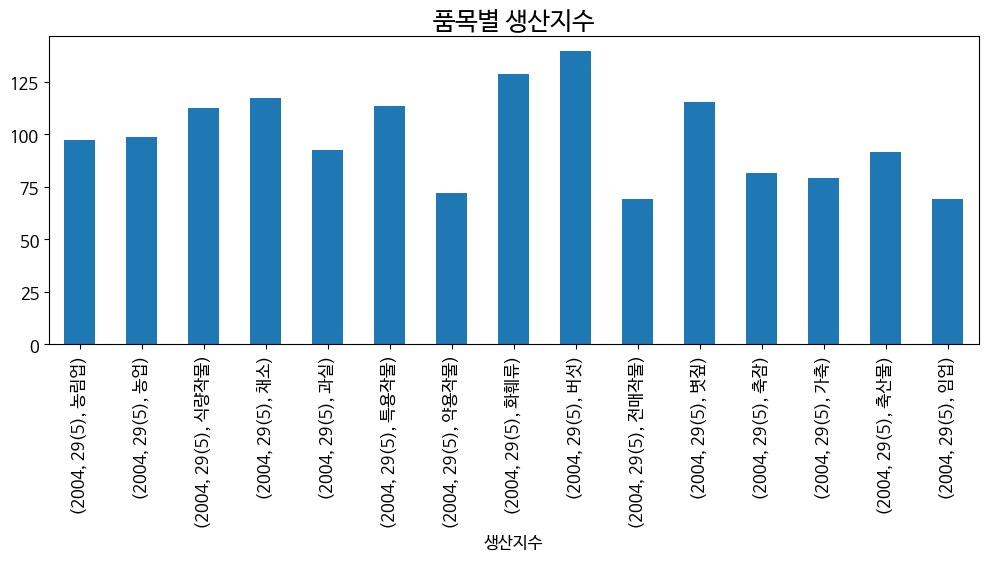

In [ ]:
# 데이터 시각화
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨지는 것 방지

ax = typhoon_agri.query('년==2004')['생산지수'].plot(kind='bar', title='품목별 생산지수', figsize=(12,4), legend=False, fontsize=12)
ax.set_xlabel('품목', fontsize=12)
ax.set_xlabel('생산지수', fontsize=12)

Text(0.5, 0, '생산지수')

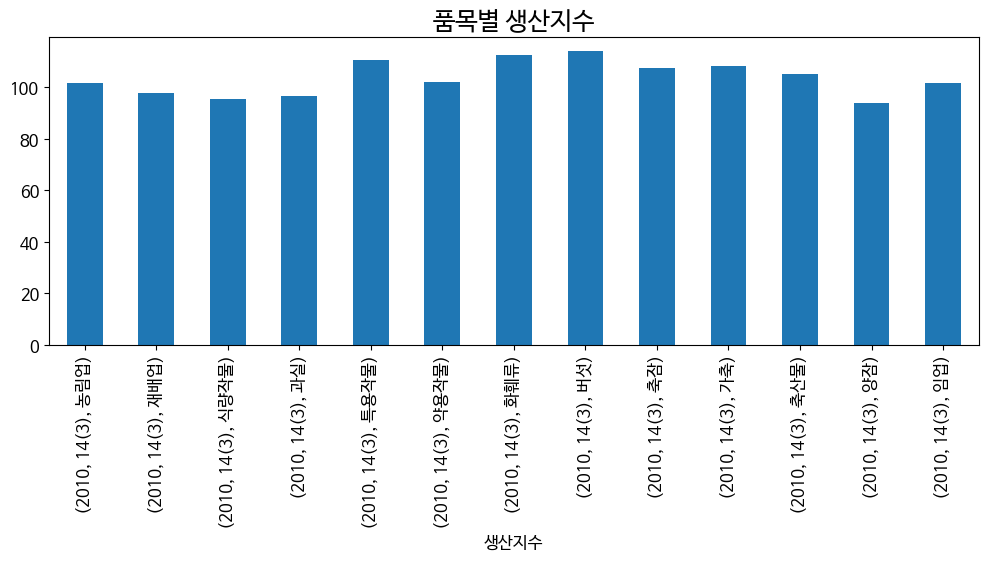

In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨지는 것 방지

ax = typhoon_agri.query('년==2010')['생산지수'].plot(kind='bar', title='품목별 생산지수', figsize=(12,4), legend=False, fontsize=12)
ax.set_xlabel('품목', fontsize=12)
ax.set_xlabel('생산지수', fontsize=12)

=> 태풍이 가장 적게 왔던 연도와 비교했을 때 태풍이 가장 많이 온 연도의 약용작물과 전매작물의 생산지수가 상대적으로 낮고, 화훼류와 버섯의 생산지수가 상대적으로 높은 것으로 보아 약용작물과 전매작물은 태풍의 영향을 더 크게 받고, 화훼류와 버섯은 작게 받음을 유추할 수 있다.

**5. 결론 및 한계점**
- 태풍발생횟수와 농작물의 생산지수는 음의 상관관계를 갖고 있음을 확인할 수 있다.
- 농작물 중에서도 약용작물과 전매작물은 상대적으로 더 크게 태풍의 영향을 받고, 화훼류와 버섯은 상대적으로 더 작게 영향을 받음이 유추된다.
- 그러나 위와 같은 결론은 연간 태풍의 발생 횟수만을 고려한 것으로, 태풍이 직접적인 영향을 미쳤는지의 여부는 고려하지 않았기 때문에 한계가 있다.